In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
A0003 = scipy.io.loadmat('/content/drive/MyDrive/data/parse_maps.mat')


In [ ]:
import h5py
with h5py.File('/content/drive/MyDrive/data/parse_maps.mat', 'r') as f:
    f.keys()

In [ ]:
#!pip install mat73
import mat73
A0008 = mat73.loadmat('/content/drive/MyDrive/data/A0005_ASL_NR_epoch_parsed.mat')
#parse_maps = mat73.loadmat('/content/drive/MyDrive/data/parse_maps.mat')

In [ ]:
import numpy as np, h5py 
A0008 = h5py.File('/content/drive/MyDrive/data/A0005_ASL_NR_epoch_parsed.mat','r') 
#f.keys()


In [ ]:
A0008.keys()

<KeysViewHDF5 ['data', 'labels', 'task', 'time']>

In [ ]:
parse_maps

{'label_map': None, 'task_map': None}

In [ ]:
len(A0003['data'][0][0])

900

In [ ]:
A0003.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ans', 'data', 'labels', 's', 'subject', 'subjectlist', 'task', 'time'])

In [ ]:
import numpy as np
#print(len(A0003['labels'][0]))
#A0003['labels'][0]
print(f"number of unique tasks is {np.unique(A0003['task'])}")
print(f"number of unique labels is {np.unique(A0003['labels'])}")
print(f"number of trials {len(A0003['data'])}")
print(f"number of length of each trial first dimentions {len(A0003['data'][0])}")
print(f"number of length of each trial second dimentions  {len(A0003['data'][0][0])}")
print(f"time length {len(A0003['time'][0])}")
print(f"data dimentions are {len(A0003['data']), len(A0003['data'][0]), len(A0003['data'][0][1])}")
print(f"subjectlist are  {np.unique(A0003['subjectlist'][0])} that represent the subject of interest")
print(f"time length {len(A0003['time'][0])}")
print(f"label dimentions are {len(A0003['labels']), len(A0003['labels'][0])} which {np.unique(A0003['labels'][0])} amount of them are unique")
print(f"number of unique tasks are {np.unique(A0003['task'])} that has the lenght of {len(A0003['task'][0])}")

number of unique tasks is [1 2 3 4 5]
number of unique labels is [ 0  1  2  3  4  5  6  7  8  9 10]
number of trials 499
number of length of each trial first dimentions 256
number of length of each trial second dimentions  900
time length 900
data dimentions are (499, 256, 900)
subjectlist are  [array(['A0003'], dtype='<U5') array(['A0005'], dtype='<U5')
 array(['A0007'], dtype='<U5') array(['A0008'], dtype='<U5')
 array(['A0014'], dtype='<U5') array(['A0051'], dtype='<U5')
 array(['A0054'], dtype='<U5') array(['A0056'], dtype='<U5')
 array(['A0057'], dtype='<U5') array(['A0068'], dtype='<U5')
 array(['A0072'], dtype='<U5') array(['A0078'], dtype='<U5')
 array(['A0085'], dtype='<U5') array(['A0091'], dtype='<U5')
 array(['A0094'], dtype='<U5') array(['A0097'], dtype='<U5')
 array(['A0098'], dtype='<U5') array(['A0099'], dtype='<U5')
 array(['A0100'], dtype='<U5') array(['A0101'], dtype='<U5')] that represent the subject of interest
time length 900
label dimentions are (2, 499) which [ 

In [ ]:
# A0003['data'][0][1]
# np.unique(A0003['labels'][1])
# np.bincount(A0003['labels'][1])

In [ ]:
C = []
for i, j in zip(A0003['labels'][0], A0003['labels'][1]):
  C.append((i, j))

In [ ]:
D = []
for i, j in zip(C, A0003['task'][0]):
  D.append((j, i))


In [ ]:
# D = set(D)
# D

task_dict = {}
label_dict = {10:'bag', 9:'bell', 8:'cane', 7:'lamp', 6:'plane', 1:'black', 2:'brown', 3:'green', 4:'red', 5:'white'}

In [ ]:
D

In [ ]:
D_dict = {}
for i in D:
  if i not in D_dict.keys():
    D_dict[i] = 1
  else:
    D_dict[i] +=1

In [ ]:
# 5 is the task index for noun
# 4 is the task index for adj
# 2, 3 are for adj noun
D_dict

In [ ]:
label_index_10 = []
A0003['labels'][0]
for i in range(len(A0003['labels'][0])):
  if A0003['labels'][0][i] == 1 and A0003['labels'][1][i] == 0:
    label_index_10.append(i)
# label_index_10 = np.array(label_index_10)

In [ ]:
from random import shuffle
shuffle(label_index_10)

In [ ]:
label_index_10

In [ ]:
label_index_10_subset = [[56, 311, 159, 67], [463, 70, 469, 59], [151, 152, 160, 308], [150, 321, 154, 455], [467, 54, 312, 302]]

In [ ]:
label_avg_dict = {1:0, 2:0, 3:0, 4:0, 5:0}
cnt = 1
for i in label_index_10_subset:
  tmp = 0 
  for j in i:
    tmp += A0003['data'][j]
  label_avg_dict[cnt] = tmp/4
  cnt += 1
  

  


In [ ]:
label_avg_dict

In [ ]:
A0003['labels'].shape
# A0003['data'].shape

(2, 499)

In [ ]:
from gensim.models import word2vec
corpus = [
          'Text of the first document.',
          'Text of the second document made longer.',
          'Number three.',
          'This is number four.',
]
# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in corpus]
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)


In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.0 MB 442 kB/s 


In [ ]:
# cite neurokit2 library
import neurokit2 as nk 
def signal_cleaning(signal, method='butterworth', sampling_rate=1000, lowcut=None, highcut=None):
  '''
  Clean the noise from the signal using neurokit2 library
  Input: signal[ could accept[list, np.array, pd.Series]: singal time series
  method: noise cancelling method, between options of 'butterworth', ‘fir’ or ‘savgol’ filters
  sampling_rate: the recording sampling rate of the signal
  lowcut[float]: "Lower cutoff frequency in Hz. The default is None." neurokit2 function description
  highcut[float]: "Upper cutoff frequency in Hz. The default is None." neurokit2 function description
  output: Cleaned signal 
  '''

  cleaned_signal = nk.signal_filter(signal, sampling_rate=sampling_rate, lowcut=lowcut, highcut=highcut, 
                                  method=method, order=2, window_size='default', powerline=50)
  return cleaned_signal

In [ ]:
# verbatm based on Honari paper
# we trained using 100ms windows of time, shifted in increments of 5ms across the full time window

In [ ]:
MEG = A0003['data'][0]
labels = A0003['labels'][0].flatten()

print('MEG dimensions:', MEG.shape)
print('Label dimensions:', labels.shape)

MEG dimensions: (256, 900)
Label dimensions: (499,)


In [ ]:
MEG.shape[1]

900

In [ ]:
# 0.1Hz and 40Hz. Honari lowcut and highcut
MEG = A0003['data'][2]
test = signal_cleaning(MEG, lowcut=0.1, highcut=40)

In [ ]:
MEG = A0003['data'][0]
test = signal_cleaning(MEG, lowcut=0.1, highcut=40)


In [ ]:
test[1, :].shape

(900,)

In [ ]:
A0003['data'].shape

(499, 256, 900)

In [ ]:
A0003['labels'][1] 

array([ 6,  9, 10, 10,  8,  8,  8,  7,  8,  7,  9,  9,  6,  8,  6,  9,  7,
        8,  8, 10,  7,  7, 10,  6, 10,  1,  5,  5,  3,  2,  5,  4,  5,  1,
        4,  3,  1,  3,  2,  4,  4,  2,  5,  5,  2,  3,  4,  1,  3,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  6, 10,  6,  8,  8,  7,  9,  7,  7,  9,
        9,  6,  8, 10,  7,  8,  9,  8,  7,  9,  6,  9,  9,  7, 10,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  9, 10,  7,  6,  6,  7, 10,  6,  9,  7,  9,
        9,  8,  6,  6,  8,  6,  7,  8, 10, 10,  7,  9,  9, 10,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 10, 10,  7,  6,  6,  8,  9,  6,  8,  6,  6, 10,
        8,  8,  7,  7,  9,  6, 10, 10,  7, 10, 10,  8,  9,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


TypeError: ignored

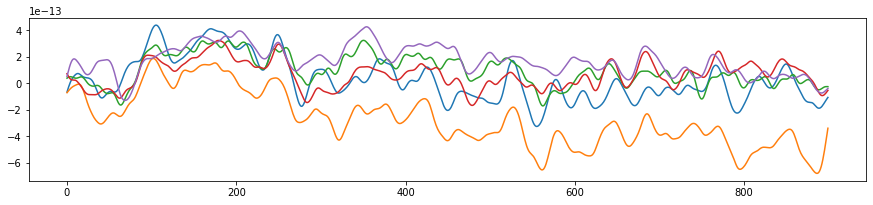

In [ ]:
# plotting selected channels for one subject  
figure(figsize=(15,3))
#plot(test.T)
for i in range(5):
  plot(test[i, :])

In [ ]:
# good link to window the time series
#https://hub.gke2.mybinder.org/user/wmvanvliet-neur-ience_tutorials-8qumyyto/notebooks/eeg-bci/4.%20Classifying%20the%20P300.ipynb

# excellent resource for neuroscience data analysis
# https://mne.tools/stable/index.html